# Partie I: Prétraitement des données.

## Lecture des bases de données en format CSV.


In [2]:
#Python library

# Classic,data manipulation and linear algebra

import pandas as pd
import numpy as np

#Importation data
import os
import glob
from pandas import set_option

#Graphical tools
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

#Statistiques
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import scipy.stats as stats

#Data imputing/preprocessing

# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer,QuantileTransformer
from sklearn.cluster import KMeans

# Classifiers
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import ElasticNet, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Metrics and ML processing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,make_scorer,r2_score, mean_absolute_error,mean_pinball_loss
#from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from datetime import datetime
#import missingno as msno

#warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

sns.set(rc={'figure.figsize':(6, 4)})
sns.set_theme(context="notebook", style="white", palette="pastel",font_scale=0.9)

# Pour la reproductibilité des résultats
#rs=np.random.seed(42)
rs=42
#import pandas_profiling as pp

## Partie I: Prétraitement des données.

### Chargement des données

In [27]:
def load_db():
    salaire_employe_CNP = pd.read_csv(r"D:\Daiana\Documents\AEC Intelligence artificielle\Mise en place d'un écosystème d'IA\salary\data\processed\salaire_employe_CNP",sep=",")
    return salaire_employe_CNP

In [28]:
salaire_employe_CNP=load_db()

In [29]:
print("Les dimensions jeu de données salaire:",salaire_employe_CNP.shape)


Les dimensions jeu de données salaire: (84135, 15)


In [30]:
salaire_employe_CNP.head()

,Annee,Regions,CNP,Sexe,Groupe d'âge,Genre de travail,Ratio_salaire_hebdo_moyen,Ratio_salaire_hebdo_median,Ratio_salaire_horaire_moyen,Ratio_salaire_horaire_median,Salaire hebdomadaire moyen,Salaire hebdomadaire médian,Salaire horaire moyen,Salaire horaire médian,"Total des employés, tous les salaires"
0,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 à 24 ans,Employés à temps partiel,0.96,1.15,0.94,0.91,118.06,110.0,7.57,7.00,5.2
1,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 à 24 ans,Employés à temps plein,0.84,0.84,0.85,0.85,366.70,346.0,9.47,9.00,13.2
2,1997,Alberta,"Affaires, finance et administration [1]",Femmes,15 à 24 ans,Ensemble des employés à temps plein et à temps...,0.85,0.92,0.87,0.82,296.95,310.0,8.94,8.08,18.4
3,1997,Alberta,"Affaires, finance et administration [1]",Femmes,25 à 54 ans,Employés à temps plein,0.66,0.69,0.70,0.73,529.89,500.0,13.88,13.13,105.1
4,1997,Alberta,"Affaires, finance et administration [1]",Femmes,25 à 54 ans,Ensemble des employés à temps plein et à temps...,0.61,0.66,0.70,0.74,479.37,461.7,13.69,13.00,126.1


In [31]:
salaire_employe_CNP.columns

Index(['Annee', 'Regions', 'CNP', 'Sexe', 'Groupe d'âge', 'Genre de travail',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

In [33]:
salaire_employe=salaire_employe_CNP[['Annee', 'Regions', 'CNP', 'Sexe',"Groupe d'âge", "Genre de travail",'Salaire horaire moyen']].copy()

### Séparation des variables X et de la réponse y de la base de données.

In [34]:
# Caractéristiques mesurées
X = salaire_employe.drop(['Salaire horaire moyen'], axis=1)

# Réponse binaire
y = salaire_employe["Salaire horaire moyen"]

# Liste des variables utilisées
feature_list = list(X.columns)

### Séparation des données en ensembles d'entrainement (80%) et de test (20 %).

Séparer le jeux des données en un ensemble d'entrainement (qui va servir à entrainer un algorithme de regression) et un ensemble de test (qui va permettre d'en mesurer les performances sur des données jamais rencontrées).


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [13]:
y_train_=pd.DataFrame(y_train,columns=["Salaire horaire moyen"])
y_test_=pd.DataFrame(y_test,columns=["Salaire horaire moyen"])

### Transformation des données

La variable **Salaire horaire moyen** est asymétrique à droite. 
On utilise la transformation logarithmique pour obtenir une distribution normale.

In [36]:
def log_transform(data,col):
    for column in col:
        if (data[column]==1.0).all():
            data[column+"_log"]=np.log(data[column]+1)
        else:
            data[column+"_log"]=np.log(data[column]+1)
    data.info()       

In [37]:
log_transform(y_train_,["Salaire horaire moyen"])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67308 entries, 15219 to 15795
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Salaire horaire moyen      67308 non-null  float64
 1   Salaire horaire moyen_log  67308 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


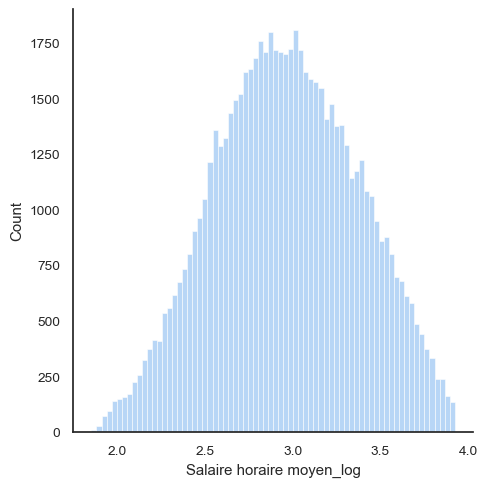

In [39]:
sns.displot(y_train_["Salaire horaire moyen_log"])
plt.show()

In [40]:
y_train_.describe()

,Salaire horaire moyen,Salaire horaire moyen_log
count,67308.000000,67308.000000
mean,20.032748,2.963136
std,8.693708,0.409302
min,5.390000,1.854734
25%,13.430000,2.669309
50%,18.260000,2.958030
75%,25.090000,3.261552
max,49.520000,3.922369


In [41]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogramme
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('histogramme')

    # Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\daian\AppData\Local\Temp\ipykernel_21964\2179639837.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




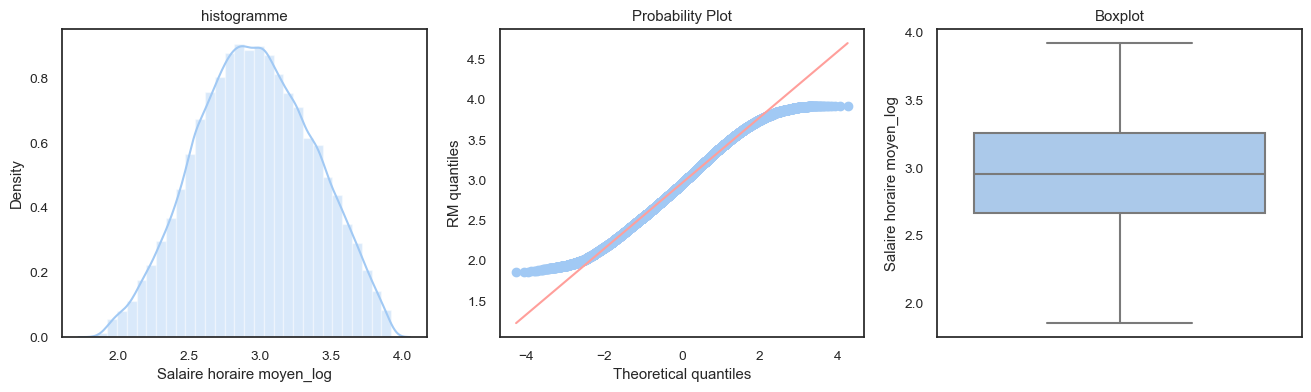

In [42]:
diagnostic_plots(y_train_,"Salaire horaire moyen_log")

In [43]:
from scipy.stats import jarque_bera

print(jarque_bera(y_train_["Salaire horaire moyen_log"]))

Jarque_beraResult(statistic=871.5971349870844, pvalue=0.0)


La variable *Salaire horaire moyen_log* ne suit pas une lois normale, mais elle s'approche plus que la variable salaire horaire moyen

### Encodage des variable catégorielle

In [44]:
def encode_df(df):
    df_encode=df.copy()
    df_encode= pd.get_dummies(df_encode, columns=["Genre de travail", 'Regions', 'CNP', 'Sexe', "Groupe d'âge"],drop_first=True)
    return df_encode

In [45]:
x_train=encode_df(X_train)
x_test=encode_df(X_test)

y_train_log=np.log(y_train)
y_test_log=np.log(y_test)

## Partie II: Entrainement d'un classifieur.

On va utiliser  six(6)modèles de regression differents et nous allons vérifier lequel va bien fonctionner.

 * Linear Regression, 
 * Decision Tree Regression, 
 * Random Forest Regression, 
 * Gradient Boosting Machine Regression, 
 * Light Gradient Boosting Machine Regression,
 * Xtreme Gradient Boosting Machine Regression, 
 * Cat Boost Regression

### Modèles de regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
# Train all 7 models on x_train and y_train
lrmodel=LinearRegression().fit(x_train,y_train_log)
dt_model = DecisionTreeRegressor().fit(x_train,y_train_log)
rf_model=RandomForestRegressor().fit(x_train,y_train_log)
gbm_model=GradientBoostingRegressor().fit(x_train,y_train_log)



In [47]:
# define function to evaluate all these 7 models
def evaluate_model(model,x_test,y_test):
    prediction=model.predict(x_test)
    print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
   # print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squared Error:",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))

In [48]:
# Lets evaluate these 7 models and see the results
print("LR_Model:")
print(evaluate_model(lrmodel,x_test,y_test_log))
print()
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test_log))
print()
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test_log))
print()
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test_log))
print()


LR_Model:
Mean Absolute Error: 0.094950458102914
Mean Squared Error: 0.014924924930997409
Root Mean Squared Error: 0.12216760999134513
R2 Score: 0.9214261580818303
None

DT_Model:
Mean Absolute Error: 0.058493589950223565
Mean Squared Error: 0.008122618712716655
Root Mean Squared Error: 0.09012557191339567
R2 Score: 0.9572376168292115
None

RF_Model:
Mean Absolute Error: 0.05197414787386778
Mean Squared Error: 0.005180340516544719
Root Mean Squared Error: 0.07197458243397262
R2 Score: 0.9727275508110664
None

GBM_Model:
Mean Absolute Error: 0.13194915476971367
Mean Squared Error: 0.026454288993011405
Root Mean Squared Error: 0.16264774512120175
R2 Score: 0.8607286045990485
None



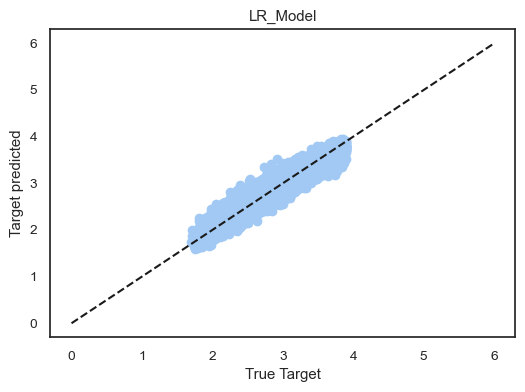

In [49]:
f, (ax0) = plt.subplots(1, 1, sharey=True)
ax0.scatter(y_test_log, lrmodel.predict(x_test))
ax0.plot([0, 6], [0, 6], "--k")
ax0.set_ylabel("Target predicted")
ax0.set_xlabel("True Target")
plt.title('LR_Model')
plt.show()

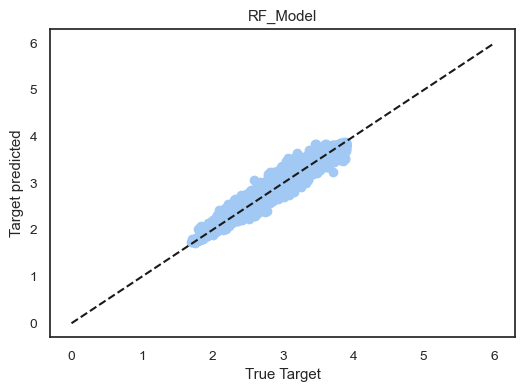

In [50]:
f, (ax0) = plt.subplots(1, 1, sharey=True)
ax0.scatter(y_test_log, rf_model.predict(x_test))
ax0.plot([0, 6], [0, 6], "--k")
ax0.set_ylabel("Target predicted")
ax0.set_xlabel("True Target")
plt.title('RF_Model')
plt.show()

### Feature importance

In [60]:

def plot_importance(model, features, num=len(x_train), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()


C:\Users\daian\AppData\Local\Temp\ipykernel_21964\3826766625.py:8: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



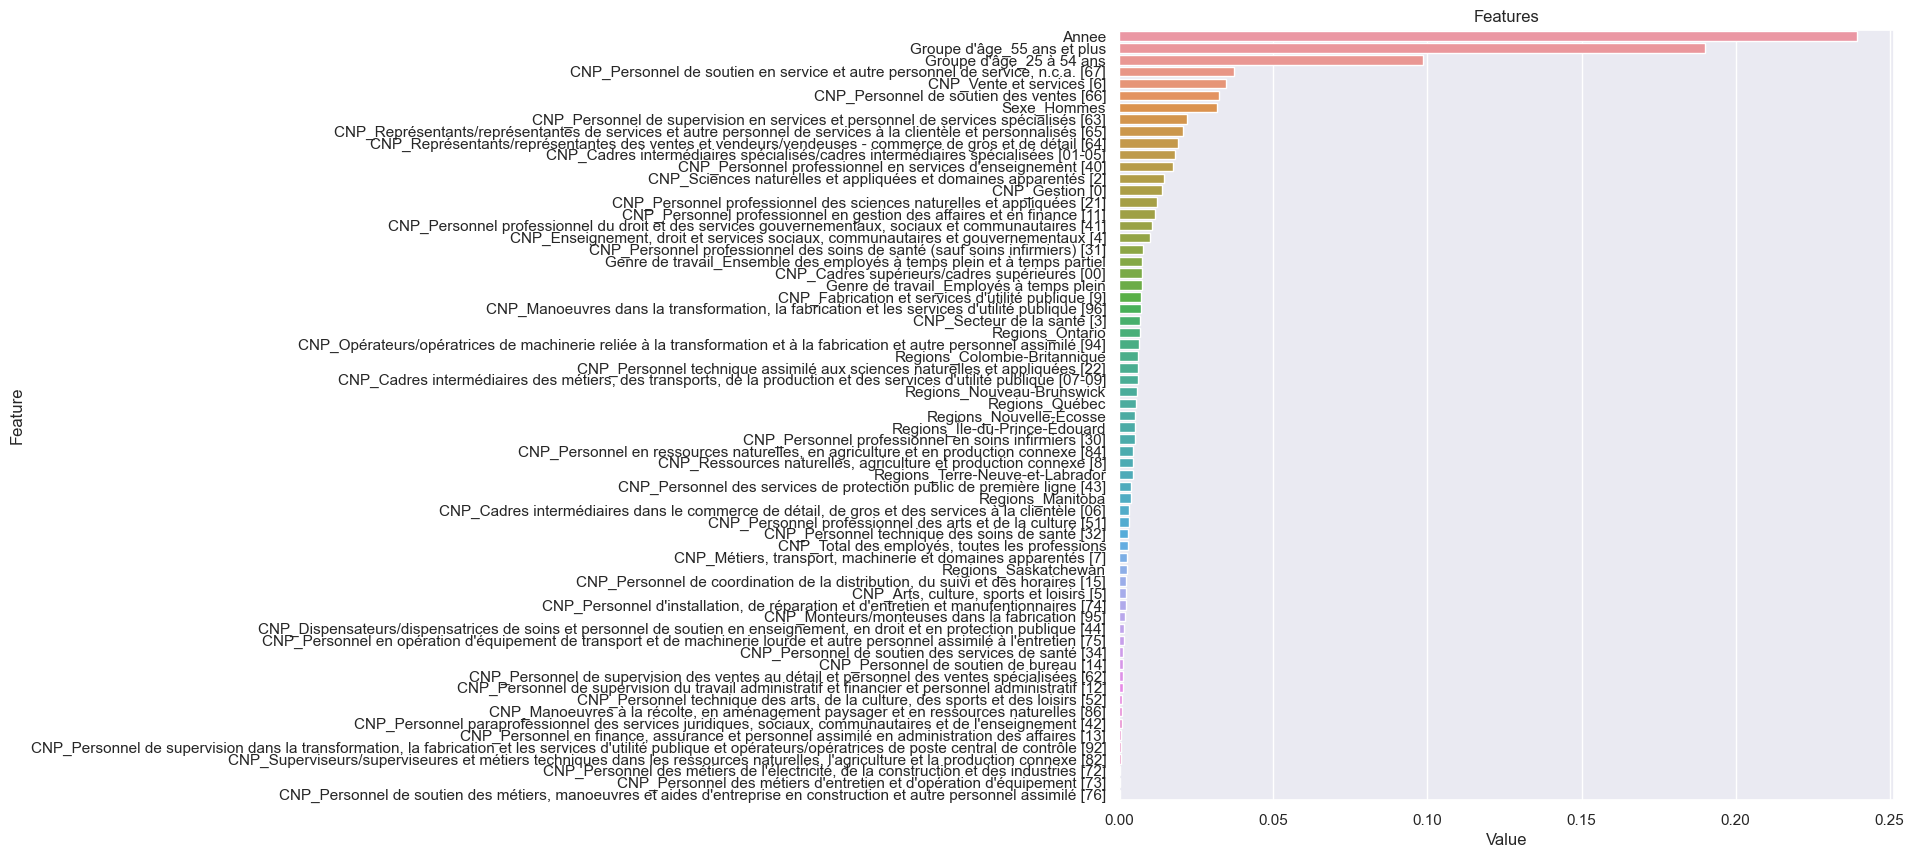

In [62]:
plot_importance(rf_model, x_train)

### Expliquer la prédiction individuelle à l'aide de LimeTabularExplainer

https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions#:~:text=The%20lime_tabular%20module%20has%20a%20class%20named%20LimeTabularExplainer,array%29%20that%20were%20used%20to%20train%20the%20model.
 

 

In [52]:
from lime.lime_tabular import LimeTabularExplainer

explainer=LimeTabularExplainer(x_train.to_numpy(),
                              feature_names=x_train.columns,
                              mode='regression')
explainer

In [54]:
import random
idx=random.randint(1,len(x_test))
print("La valeur prédite:",  np.exp2(rf_model.predict(np.array(x_test.iloc[idx]).reshape(-1,65))))
print("La vrais valeur:", np.exp2(y_test_log.iloc[idx]))

exp = explainer.explain_instance(x_test.to_numpy()[idx],rf_model.predict, num_features=x_train.shape[1])
exp.show_in_notebook(show_table=True)

c:\Users\daian\anaconda3\envs\salaire\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



La valeur prédite: [6.07541944]
La vrais valeur: 6.058577519014531


c:\Users\daian\anaconda3\envs\salaire\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### Tunning

In [55]:
param_grid = {'C': [0.1, 1,2],
              #'degree' : [2],
              #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma' : ['auto','scale'],
              'kernel': ['linear','rbf', 'sigmoid']} #,, 'poly' 'rbf', 'sigmoid'
 
#---------train the model------------------------------------------------------
score = make_scorer(mean_squared_error)
grid = GridSearchCV(SVR(), param_grid, 
                        cv = 2,
                        n_jobs= -1,
                       return_train_score=True)
grid.fit(x_train, y_train_log)
print(grid.best_params_)

model=grid.best_estimator_
print(model)
model.fit(x_train,y_train_log)


{'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
SVR(C=2, gamma='auto')


SVR(C=2, gamma='auto')

MSE: sur donnees de test 0.33
R2 sur donnees de test: 0.94
MSE: sur donnees de training 0.32
R2 sur donnees de training: 0.94
       Salaires prédit  Salaire initial
47528              9.0         8.734714
58622             10.0        10.662269
59260              9.0         9.569749
51881              7.0         7.001159
77762             10.0         9.513570


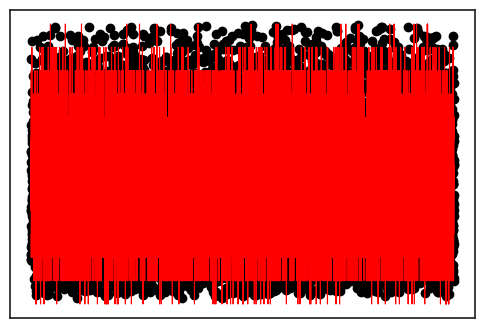

In [56]:

prediction_train=model.predict(x_train)
ypred=model.predict(x_test)

# ------inverse operation de log--------------------------------------------

prediction_train = np.round(np.exp2(prediction_train),0)
y_train    = np.exp2(y_train_log)

ypred  = np.round(np.exp2(ypred),0)
y_test = np.exp2(y_test_log)

#------------------metrics-------------------------------------------------------
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

mse_t = mean_squared_error(prediction_train,y_train)
r2_t = r2_score(y_train, prediction_train)

print("MSE: sur donnees de test %.2f" % mse)
print("R2 sur donnees de test: %.2f" % r2)

print("MSE: sur donnees de training %.2f" % mse_t)
print("R2 sur donnees de training: %.2f" % r2_t)
# -----------------difference valeurs predite et reele---------------------------

data = pd.DataFrame(data={"Salaires prédit": ypred,"Salaire initial":y_test})
print(data.head(5))


x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, color="black",label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")

plt.xticks(())
plt.yticks(())

plt.show()

## Annexe

### La régression polynomiale

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_poly, y_train_log)

In [107]:
def evalPolynonmialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(x_train)
    X_test_poly = polynomial_features.fit_transform(x_test)
    model = LinearRegression()
    model.fit(x_train_poly,y_train)
    # Evaluation du training set
 
    y_train_predict = model.predict(x_train_poly)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)
 
    print('La performance du modèle sur la base dapprentissage')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    print('\n')
 
    # Evaluation du testing set
    y_test_predict = model.predict(x_test_poly)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
 
    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    return model,r2 ,rmse

In [108]:
evalPolynonmialRegression(4)

MemoryError: Unable to allocate 727. GiB for an array with shape (36500, 2672670) and data type float64

https://medium.com/@goradbj/how-to-build-complete-end-to-end-ml-model-backend-restapi-using-fastapi-and-front-end-ui-using-22f64bf04476

https://dataindependent.com/pandas/pandas-bar-plot-dataframe-plot-bar/#:~:text=Pandas%20Bar%20Plot%20is%20a%20great%20way%20to,Pandas%20will%20draw%20a%20chart%20for%20you%20automatically.

In [ ]:
#salaire_employe_CNP['key'] = 1
#duree_emploi_CNP['key'] = 1
#result = pd.merge(salaire_employe_CNP, duree_emploi_CNP, on ='key').drop("key", 1)
